<a href="https://colab.research.google.com/github/JulianSKYOO/MATH3041/blob/main/MATH3041_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MATH3041 Individual Assignment**


> Sungkyun Yoo, z5378786





 This report is to deliver any insights from the relationship between the economic growth and greenhouse gas emission.



In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

# Setting plt
%matplotlib inline

In [ ]:
# Coomputing X and Y
def linear_fit(xx,yy):

  X = xx.values
  Y = yy.values

  # Total number of values
  n = len(X)

  numer = n*sum(X*Y) - sum(X)*sum(Y)
  denom = n*sum(X**2) - sum(X)**2

  m = numer/denom

  b = (sum(Y)- m*sum(X))/n

  return(m, b) # return coefficents

In [ ]:
# Getting the DataFrame
raw_1 = 'https://raw.githubusercontent.com/JulianSKYOO/MATH3041/main/gdp_energy_ghg.csv'
data_1 = pd.read_csv(raw_1)
raw_2 = 'https://raw.githubusercontent.com/JulianSKYOO/MATH3041/main/co2_gdp_energy.csv'
data_2 = pd.read_csv(raw_2)
raw_3 = 'https://raw.githubusercontent.com/JulianSKYOO/MATH3041/main/CO2.csv'
data_4 = pd.read_csv(raw_3)

In [ ]:
raw_s1 = 'https://raw.githubusercontent.com/JulianSKYOO/MATH3041/main/s1_new.csv'
raw_s2 = 'https://raw.githubusercontent.com/JulianSKYOO/MATH3041/main/s2_new.csv'
raw_s3 = 'https://raw.githubusercontent.com/JulianSKYOO/MATH3041/main/s3_new.csv'
data_s1 = pd.read_csv(raw_s1)
data_s2 = pd.read_csv(raw_s2)
data_s3 = pd.read_csv(raw_s3)

In [ ]:
data_4 = data_4.dropna()

In [ ]:
data_e = data_1[['Entity', 'Year', "Population (historical estimates)", "Primary energy consumption per GDP (kWh/$)", "GDP per capita", "Annual CO₂ emissions", "Annual CO₂ emissions per unit energy (kg per kilowatt-hour)"]]

In [ ]:
data_e = data_e.rename(columns={"Population (historical estimates)":"Population", "Primary energy consumption per GDP (kWh/$)":"energy consumption / GDP", "Annual CO₂ emissions per unit energy (kg per kilowatt-hour)":"Annual CO₂ emissions / energy"})
GDP = data_e['Population'] * data_e['GDP per capita']
data_e['Total GDP'] = GDP
data_e

,Entity,Year,Population,energy consumption / GDP,GDP per capita,Annual CO₂ emissions,Annual CO₂ emissions / energy,Total GDP
0,Afghanistan,1965,9565154.0,NaN,1290.0000,1006917.0,NaN,1.233905e+10
1,Afghanistan,1966,9783153.0,NaN,1272.0000,1091159.0,NaN,1.244417e+10
2,Afghanistan,1967,10010037.0,NaN,1277.0000,1281865.0,NaN,1.278282e+10
3,Afghanistan,1968,10247782.0,NaN,1290.0000,1223391.0,NaN,1.321964e+10
4,Afghanistan,1969,10494491.0,NaN,1278.0000,941232.0,NaN,1.341196e+10
...,...,...,...,...,...,...,...,...
15987,Zimbabwe,2017,14751101.0,2.092965,1582.3662,9596071.0,0.208901,2.334164e+10
15988,Zimbabwe,2018,15052191.0,2.091188,1611.4052,11795478.0,0.248315,2.425518e+10
15989,Zimbabwe,2019,15354606.0,NaN,NaN,11114607.0,0.224871,NaN
15990,Zimbabwe,2020,15669663.0,NaN,NaN,10607897.0,NaN,NaN


In [ ]:
data_e = data_e.dropna()
us = data_e[data_e['Entity'] == 'United States']
cn = data_e[data_e['Entity'] == 'China']
wd = data_e[data_e['Entity'] == 'World']
wd = wd.reset_index(drop = True)
us = us.reset_index(drop = True)

coco = pd.Series([1.6e+10, 2.02e+10, 2.25e+10, 2.48e+10, 3.26e+10, 3.49e+10, 3.54e+10, 3.6e+10], name='CO2')
wd = pd.concat([wd, coco], axis=1)
us = pd.concat([us, coco], axis=1)

In [ ]:
wd_rowval = np.where(wd['Entity'] == 'World')[0]
World = [wd['Total GDP'][wd_rowval[0]:wd_rowval[-1]], wd['CO2'][wd_rowval[0]:wd_rowval[-1]]]
Worldy = [wd['Year'][wd_rowval[0]:wd_rowval[-1]], wd['energy consumption / GDP'][wd_rowval[0]:wd_rowval[-1]]]
Worlde = [wd['energy consumption / GDP'][wd_rowval[0]:wd_rowval[-1]], wd['Annual CO₂ emissions'][wd_rowval[0]:wd_rowval[-1]]]
Worldc = [wd['Annual CO₂ emissions / energy'][wd_rowval[0]:wd_rowval[-1]], wd['CO2'][wd_rowval[0]:wd_rowval[-1]]]
wd

,Entity,Year,Population,energy consumption / GDP,GDP per capita,Annual CO₂ emissions,Annual CO₂ emissions / energy,Total GDP,CO2
0,World,1970,3.695390e+09,2.611443,5951.549,1.489872e+10,0.261531,2.199330e+13,1.600000e+10
1,World,1980,4.444008e+09,2.444506,7232.973,1.950126e+10,0.250230,3.214339e+13,2.020000e+10
2,World,1990,5.316176e+09,2.220623,8222.479,2.275748e+10,0.238230,4.371214e+13,2.250000e+10
3,World,2000,6.148899e+09,1.841508,9914.567,2.545362e+10,0.230883,6.096367e+13,2.480000e+10
4,World,2010,6.985603e+09,1.573360,13179.495,3.336435e+10,0.236125,9.206672e+13,3.260000e+10
5,World,2016,7.513474e+09,1.441357,14700.372,3.552419e+10,0.230051,1.104509e+14,3.490000e+10
6,World,2017,7.599822e+09,1.425386,14944.094,3.609674e+10,0.229322,1.135725e+14,3.540000e+10
7,World,2018,7.683790e+09,1.423677,15212.415,3.682651e+10,0.227644,1.168890e+14,3.600000e+10


In [ ]:
data_s1.head(81)

,cum_emissions_hat1,ann,year,y1,y2,y3
0,131670.4200,0.000000,1880,0.000000e+00,0.000000e+00,NaN
1,131670.4200,0.000011,1881,2.843384e+00,2.843384e+00,6.435026e+08
2,131670.4201,0.000058,1882,1.457600e+01,1.455065e+01,6.717635e+08
3,131670.4203,0.000199,1883,5.135943e+01,5.115306e+01,7.033526e+08
4,131670.4208,0.000569,1884,1.489366e+02,1.493823e+02,7.227023e+08
...,...,...,...,...,...,...
76,790731.9275,87.831874,1956,7.388856e+07,7.388780e+07,1.135687e+10
77,790743.5236,11.596075,1957,9.914618e+06,9.914633e+06,1.196997e+10
78,790755.7155,12.191950,1958,1.059444e+07,1.059523e+07,1.251317e+10
79,790848.0670,92.351490,1959,8.156216e+07,8.156169e+07,1.333588e+10


<ipython-input-10-940970ef7bab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  world_corr = wd.corr()


<Axes: >

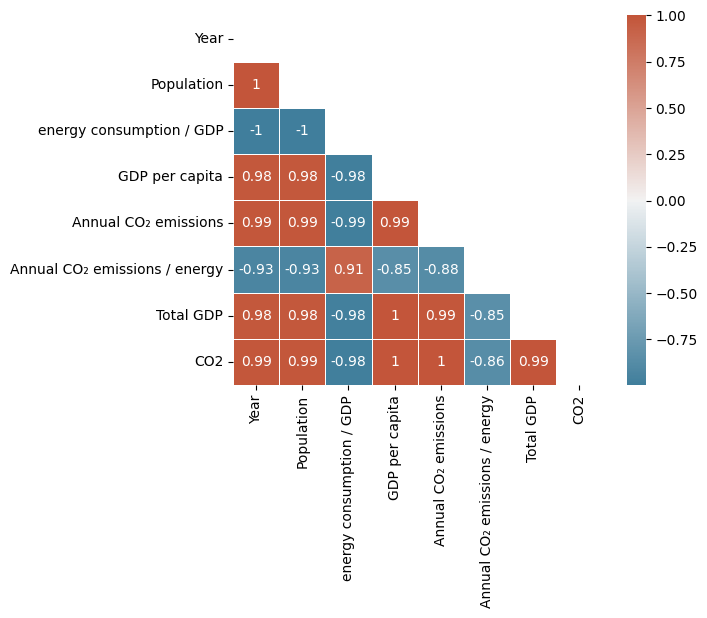

In [ ]:
world_corr = wd.corr()
mask = np.triu(np.ones_like(world_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(world_corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, annot=True)

<ipython-input-11-e38052b9fe57>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  us_corr = us.corr()


<Axes: >

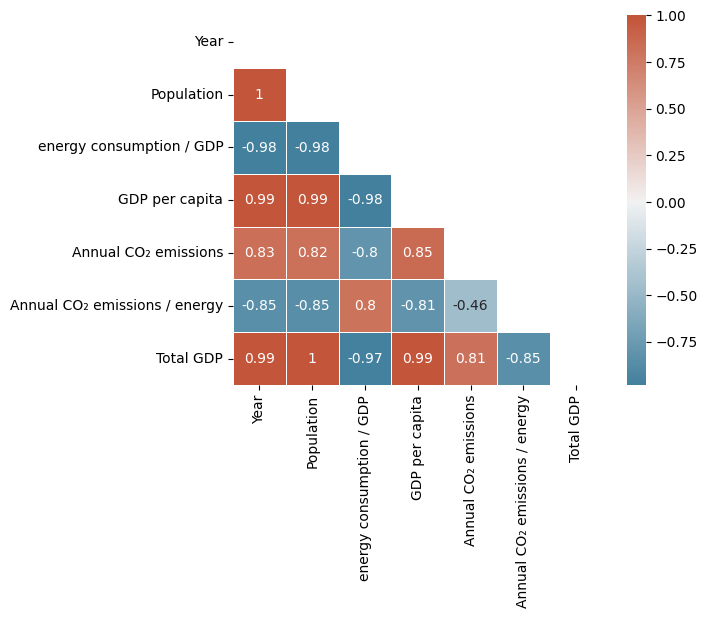

In [ ]:
us_corr = us.corr()
mask = np.triu(np.ones_like(us_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(us_corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, annot=True)

<ipython-input-12-fe6526cd3ac0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cn_corr = cn.corr()


<Axes: >

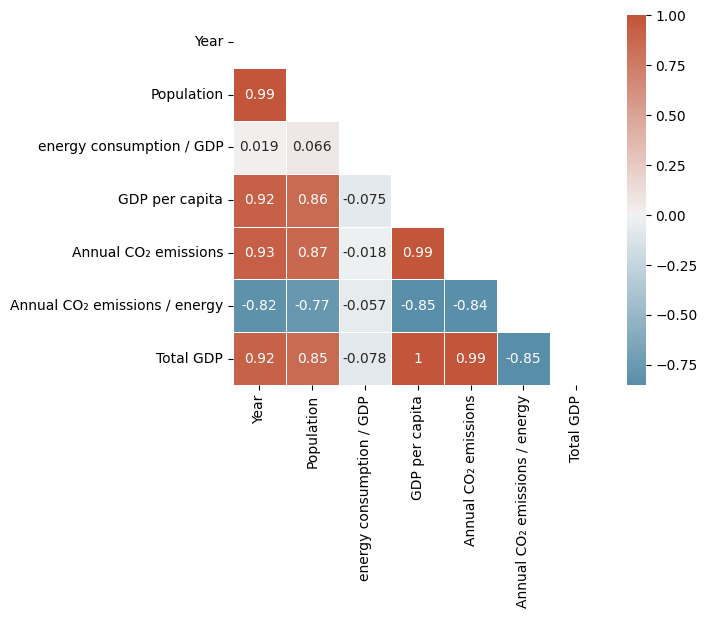

In [ ]:
cn_corr = cn.corr()
mask = np.triu(np.ones_like(cn_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cn_corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, annot=True)

<Axes: xlabel='CO2', ylabel='Total GDP'>

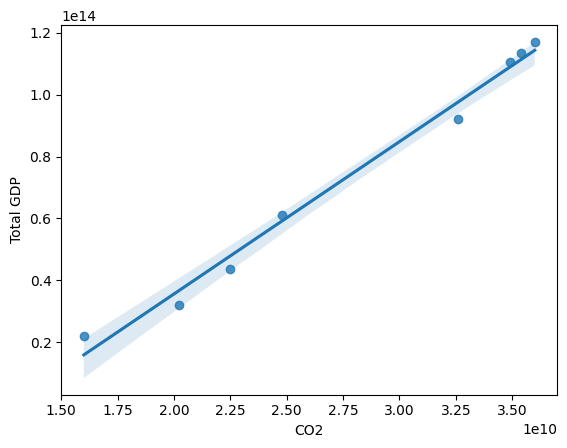

In [ ]:
sns.regplot(data=wd, x='CO2', y='Total GDP')

In [ ]:
wd['EICI'] = wd['energy consumption / GDP'] * wd['Annual CO₂ emissions / energy']
wd['Log'] = np.log(wd['EICI'])
wd

,Entity,Year,Population,energy consumption / GDP,GDP per capita,Annual CO₂ emissions,Annual CO₂ emissions / energy,Total GDP,CO2,EICI,Log
0,World,1970,3.695390e+09,2.611443,5951.549,1.489872e+10,0.261531,2.199330e+13,1.600000e+10,0.682975,-0.381298
1,World,1980,4.444008e+09,2.444506,7232.973,1.950126e+10,0.250230,3.214339e+13,2.020000e+10,0.611690,-0.491530
2,World,1990,5.316176e+09,2.220623,8222.479,2.275748e+10,0.238230,4.371214e+13,2.250000e+10,0.529019,-0.636730
3,World,2000,6.148899e+09,1.841508,9914.567,2.545362e+10,0.230883,6.096367e+13,2.480000e+10,0.425172,-0.855262
4,World,2010,6.985603e+09,1.573360,13179.495,3.336435e+10,0.236125,9.206672e+13,3.260000e+10,0.371510,-0.990178
5,World,2016,7.513474e+09,1.441357,14700.372,3.552419e+10,0.230051,1.104509e+14,3.490000e+10,0.331586,-1.103869
6,World,2017,7.599822e+09,1.425386,14944.094,3.609674e+10,0.229322,1.135725e+14,3.540000e+10,0.326872,-1.118185
7,World,2018,7.683790e+09,1.423677,15212.415,3.682651e+10,0.227644,1.168890e+14,3.600000e+10,0.324091,-1.126731


Text(0, 0.5, 'Log of Energy intensity * Carbon intensity')

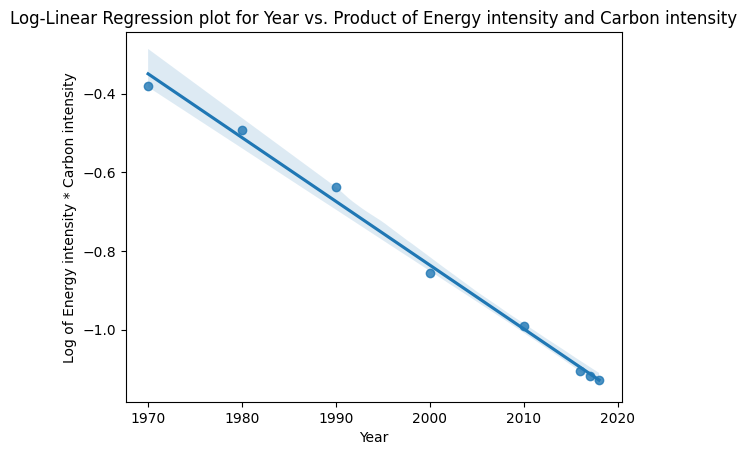

In [ ]:
sns.regplot(data=wd, x='Year', y='Log')
plt.title('Log-Linear Regression plot for Year vs. Product of Energy intensity and Carbon intensity')
plt.xlabel('Year')
plt.ylabel('Log of Energy intensity * Carbon intensity')

In [ ]:
x1 = World[1].to_numpy().reshape((-1, 1))
x2 = Worldy[0].to_numpy().reshape((-1, 1))
y1 = World[0].to_numpy()
y2 = Worlde[0].to_numpy()
y3 = Worldc[0].to_numpy()
y4 = Worlde[0] * Worldc[0]

In [ ]:
model5 = LinearRegression()
model5.fit((-1) * x2, np.log(y4))
model5.score((-1) * x2, np.log(y4))

0.9936949302306325

In [ ]:
model5.predict(np.array([[-2050]]))

array([-1.64659052])

In [ ]:
np.exp(model5.predict(np.array([[-2050]])))

array([0.19270582])

In [ ]:
np.exp(-1.64659052)

0.19270581646014232

In [ ]:
model5.predict(np.array([[-2100]]))

array([-2.45709196])

In [ ]:
np.exp(-2.45709196)

0.08568376082129367

In [ ]:
data_s1 = pd.read_csv(raw_s1)
prod = [i for i in range(1880, 2101)]
yprod = []
for i in range(221):
  a = (i + 1880) * (-1)
  pp = model5.predict(np.array([[a]]))
  pp2 = 0.744 * 1000000000 / np.exp(pp)
  yprod.append(pp2)

data_s1['y1'] = np.nan
ind = 0
for val in data_s1['ann']:
  data_s1['y1'][ind] = val * yprod[ind]
  ind = ind + 1

<ipython-input-162-fe87667d2a85>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s1['y1'][ind] = val * yprod[ind]


In [ ]:
data_s1['y2'] = np.nan
ind = 0
for val in data_s2['ann'].dropna():
  if ind == 171:
    break
  data_s1['y2'][ind] = val * yprod[ind]
  ind = ind + 1

<ipython-input-163-e90cc16f79ea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s1['y2'][ind] = val * yprod[ind]


In [ ]:
data_s1['y3'] = np.nan
ind = 0
for val in data_s3['cum'].diff():
  data_s1['y3'][ind] = val * yprod[ind]
  ind = ind + 1

<ipython-input-164-9a071bd85684>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s1['y3'][ind] = val * yprod[ind]


In [ ]:
data_s1.head(152)

,cum_emissions_hat1,ann,year,y1,y2,y3
0,1.316704e+05,0.000000,1880,0.000000e+00,0.000000e+00,NaN
1,1.316704e+05,0.000011,1881,2.843384e+03,2.843384e+03,6.435026e+11
2,1.316704e+05,0.000058,1882,1.457600e+04,1.455065e+04,6.717635e+11
3,1.316704e+05,0.000199,1883,5.135943e+04,5.115306e+04,7.033526e+11
4,1.316704e+05,0.000569,1884,1.489366e+05,1.493823e+05,7.227023e+11
...,...,...,...,...,...,...
147,4.416922e+06,110779.029600,2027,2.945896e+14,5.492032e+13,1.332580e+13
148,4.526667e+06,109745.039600,2028,2.966092e+14,4.984230e+13,-1.354357e+13
149,4.635198e+06,108530.376900,2029,2.981199e+14,4.515772e+13,-4.113375e+13
150,4.742344e+06,107146.238500,2030,2.991276e+14,4.085208e+13,-6.913455e+13


In [ ]:
df = data_s1.melt('year', var_name='y', value_name='val')
df = df.drop(df[df.y == 'cum_emissions_hat1'].index)
df = df.drop(df[df.y=='ann'].index)

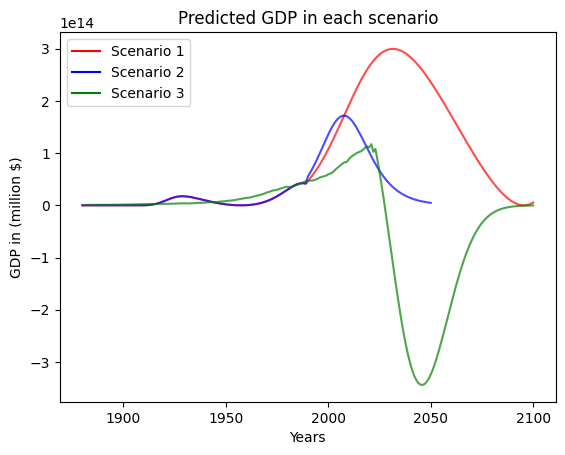

In [ ]:
ax = sns.lineplot(data=df, x='year', y='val', hue='y', palette = ['red', 'blue', 'green'], alpha = 0.7)
ax.set(xlabel = 'Years',
       ylabel = 'GDP in (million $)',
       title = 'Predicted GDP in each scenario')
hands, labs = ax.get_legend_handles_labels()
plt.legend(handles = hands, labels=["Scenario 1", "Scenario 2", "Scenario 3"])
plt.show()

In [ ]:
dfa = df[df['year'] > 2020]

In [ ]:
raw_gdp = 'https://raw.githubusercontent.com/JulianSKYOO/MATH3041/main/world-gdp-gross-domestic-product.csv'
data_gdp = pd.read_csv(raw_gdp)

In [ ]:
dat = data_s1[data_s1['year'] > 1959]
dat = dat.reset_index(drop=True)

In [ ]:
dat.loc[dat['year'] < 2023, 'y1'] = np.nan
dat.loc[dat['year'] < 2023, 'y2'] = np.nan
dat.loc[dat['year'] < 2023, 'y3'] = np.nan

In [ ]:
data_gdp.tail()

,Year,GDP ( Billions of US $),Per Capita (US $),Annual % Change
58,2018,86456.88825,11284.1833,3.28550
59,2019,87645.25564,11319.7541,2.59130
60,2020,85105.60361,10881.7037,-3.11540
61,2021,96513.07736,12234.7968,5.86980
62,2022,100562.01110,NaN,1.01952


In [ ]:
dat['y4'] = np.nan
ind = 0
for val in data_gdp[' GDP ( Billions of US $)'].dropna():
  if ind == 63:
    break
  dat['y4'].loc[ind] = val * 1000000000
  ind = ind + 1

<ipython-input-175-c0112fc256dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['y4'].loc[ind] = val * 1000000000


In [ ]:
dfall = dat.melt('year', var_name='y', value_name='val')
dfall = dfall.drop(dfall[dfall.y == 'cum_emissions_hat1'].index)
dfall = dfall.drop(dfall[dfall.y=='ann'].index)

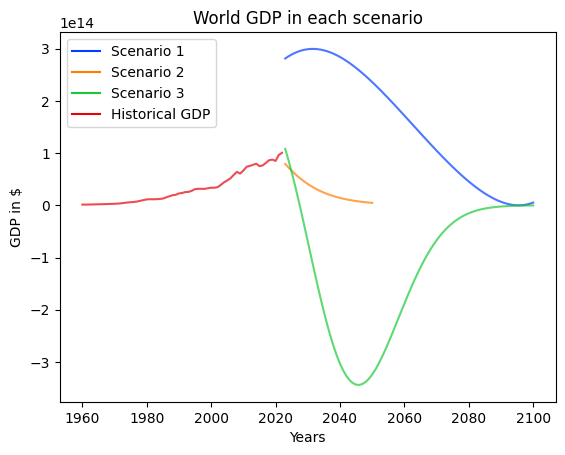

In [ ]:
ax = sns.lineplot(data=dfall, x='year', y='val', hue='y', palette = 'bright', alpha = 0.7)
ax.set(xlabel = 'Years',
       ylabel = 'GDP in $',
       title = 'World GDP in each scenario')
hands, labs = ax.get_legend_handles_labels()
plt.legend(handles = hands, labels=["Scenario 1", "Scenario 2", "Scenario 3", "Historical GDP"])
plt.show()

In [ ]:
dat

,cum_emissions_hat1,ann,year,y1,y2,y3,y4
0,7.911110e+05,262.892524,1960,NaN,NaN,NaN,1.392277e+12
1,7.916399e+05,528.941376,1961,NaN,NaN,NaN,1.448625e+12
2,7.925338e+05,893.862028,1962,NaN,NaN,NaN,1.550548e+12
3,7.938940e+05,1360.198683,1963,NaN,NaN,NaN,1.671614e+12
4,7.958240e+05,1929.993563,1964,NaN,NaN,NaN,1.830292e+12
...,...,...,...,...,...,...,...
136,7.346184e+06,10.064859,2096,8.190726e+10,NaN,-5.868963e+11,NaN
137,7.346254e+06,70.459429,2097,5.827654e+11,NaN,-4.622510e+11,NaN
138,7.346445e+06,191.243152,2098,1.607609e+12,NaN,-3.625837e+11,NaN
139,7.346818e+06,372.419640,2099,3.181757e+12,NaN,-2.832409e+11,NaN


Text(0, 0.5, 'Carbon Intensity (kg/kWh)')

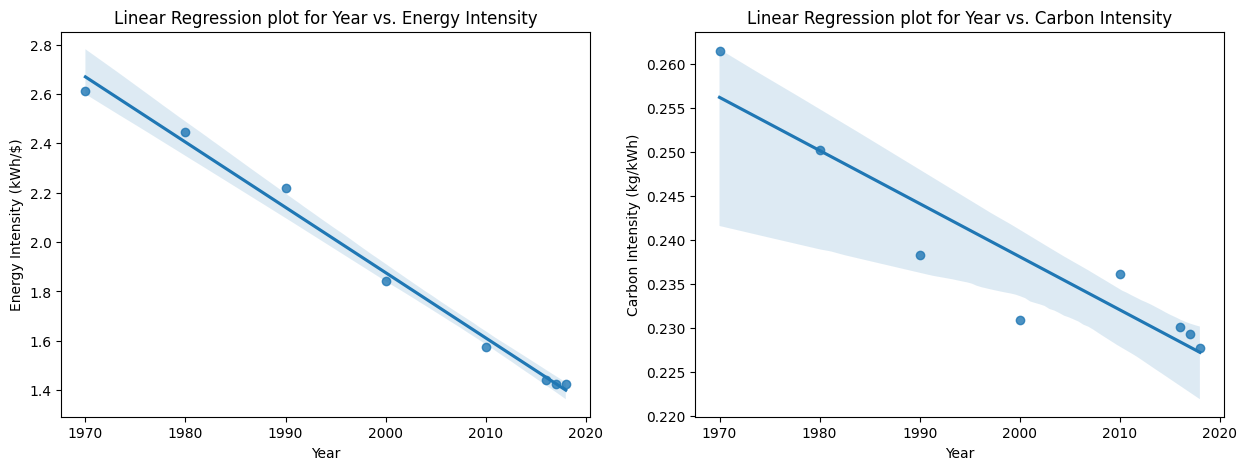

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.regplot(data=wd, x='Year', y='energy consumption / GDP')
plt.title('Linear Regression plot for Year vs. Energy Intensity')
plt.xlabel('Year')
plt.ylabel('Energy Intensity (kWh/$)')

plt.subplot(1,2,2)
sns.regplot(data=wd, x='Year', y='Annual CO₂ emissions / energy')
plt.title('Linear Regression plot for Year vs. Carbon Intensity')
plt.xlabel('Year')
plt.ylabel('Carbon Intensity (kg/kWh)')

In [ ]:
us_rowval = np.where(us['Entity'] == 'United States')[0]
USA = [us['Total GDP'][us_rowval[0]:us_rowval[-1]], us['CO2'][us_rowval[0]:us_rowval[-1]]]
USAy = [us['Year'][us_rowval[0]:us_rowval[-1]], us['energy consumption / GDP'][us_rowval[0]:us_rowval[-1]]]
USAe = [us['energy consumption / GDP'][us_rowval[0]:us_rowval[-1]], us['Annual CO₂ emissions'][us_rowval[0]:us_rowval[-1]]]
USAc = [us['Annual CO₂ emissions / energy'][us_rowval[0]:us_rowval[-1]], us['CO2'][us_rowval[0]:us_rowval[-1]]]
us

,Entity,Year,Population,energy consumption / GDP,GDP per capita,Annual CO₂ emissions,Annual CO₂ emissions / energy,Total GDP,CO2
0,World,1970,3.695390e+09,2.611443,5951.549,1.489872e+10,0.261531,2.199330e+13,1.600000e+10
1,World,1980,4.444008e+09,2.444506,7232.973,1.950126e+10,0.250230,3.214339e+13,2.020000e+10
2,World,1990,5.316176e+09,2.220623,8222.479,2.275748e+10,0.238230,4.371214e+13,2.250000e+10
3,World,2000,6.148899e+09,1.841508,9914.567,2.545362e+10,0.230883,6.096367e+13,2.480000e+10
4,World,2010,6.985603e+09,1.573360,13179.495,3.336435e+10,0.236125,9.206672e+13,3.260000e+10
5,World,2016,7.513474e+09,1.441357,14700.372,3.552419e+10,0.230051,1.104509e+14,3.490000e+10
6,World,2017,7.599822e+09,1.425386,14944.094,3.609674e+10,0.229322,1.135725e+14,3.540000e+10
7,World,2018,7.683790e+09,1.423677,15212.415,3.682651e+10,0.227644,1.168890e+14,3.600000e+10


In [ ]:
us['EICI'] = us['energy consumption / GDP'] * us['Annual CO₂ emissions / energy']
us['Log'] = np.log(us['EICI'])

In [ ]:
usx1 = USA[1].to_numpy().reshape((-1, 1))
usx2 = USAy[0].to_numpy().reshape((-1, 1))
usy1 = USA[0].to_numpy()
usy2 = USAe[0].to_numpy()
usy3 = USAc[0].to_numpy()
usy4 = USAe[0] * USAc[0]

In [ ]:
modelus = LinearRegression()
modelus.fit((-1) * usx2, np.log(usy4))
modelus.score((-1) * usx2, np.log(usy4))

0.9773526535604875

In [ ]:
modelus.predict(np.array([[-2050]]))

array([-1.82907874])

In [ ]:
np.exp(-1.82907874)

0.1605614184726311

In [ ]:
modelus.predict(np.array([[-2100]]))

array([-2.86692273])

In [ ]:
np.exp(-2.86692273)

0.05687367321904022

In [ ]:
data_s1 = pd.read_csv(raw_s1)
prod = [i for i in range(1880, 2101)]
usyprod = []
for i in range(221):
  a = (i + 1880) * (-1)
  pp = modelus.predict(np.array([[a]]))
  pp2 = 0.744 * 1000 / np.exp(pp)
  usyprod.append(pp2)

data_s1['y1'] = np.nan
ind = 0
for val in data_s1['ann']:
  data_s1['y1'][ind] = val * usyprod[ind]
  ind = ind + 1

<ipython-input-43-083aa3a760a7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s1['y1'][ind] = val * usyprod[ind]


In [ ]:
data_s1['y2'] = np.nan
ind = 0
for val in data_s2['ann'].dropna():
  if ind == 171:
    break
  data_s1['y2'][ind] = val * usyprod[ind]
  ind = ind + 1

In [ ]:
data_s1['y3'] = np.nan
ind = 0
for val in data_s3['cum'].diff():
  data_s1['y3'][ind] = val * usyprod[ind]
  ind = ind + 1

<ipython-input-45-be540b55677c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s1['y3'][ind] = val * usyprod[ind]


In [ ]:
dfus = data_s1.melt('year', var_name='y', value_name='val')
dfus = dfus.drop(dfus[dfus.y == 'cum_emissions_hat1'].index)
dfus = dfus.drop(dfus[dfus.y=='ann'].index)

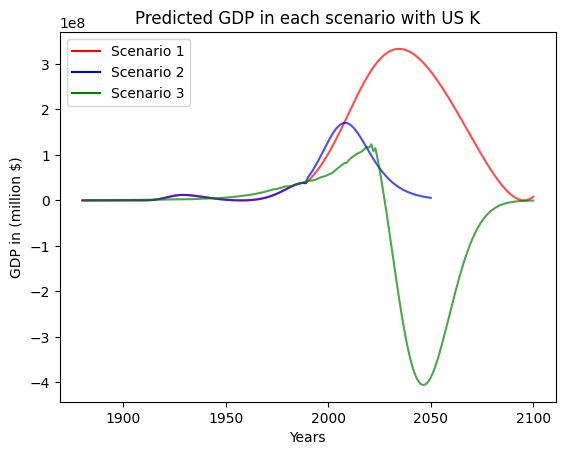

In [ ]:
ax = sns.lineplot(data=dfus, x='year', y='val', hue='y', palette = ['red', 'blue', 'green'], alpha = 0.7)
ax.set(xlabel = 'Years',
       ylabel = 'GDP in (million $)',
       title = 'Predicted GDP in each scenario with US K')
hands, labs = ax.get_legend_handles_labels()
plt.legend(handles = hands, labels=["Scenario 1", "Scenario 2", "Scenario 3"])
plt.show()

In [ ]:
dat.head(70)

,cum_emissions_hat1,ann,year,y1,y2,y3,y4
0,7.911110e+05,262.892524,1960,NaN,NaN,NaN,1.392277e+12
1,7.916399e+05,528.941376,1961,NaN,NaN,NaN,1.448625e+12
2,7.925338e+05,893.862028,1962,NaN,NaN,NaN,1.550548e+12
3,7.938940e+05,1360.198683,1963,NaN,NaN,NaN,1.671614e+12
4,7.958240e+05,1929.993563,1964,NaN,NaN,NaN,1.830292e+12
...,...,...,...,...,...,...,...
65,4.194521e+06,112263.249600,2025,2.890131e+11,6.629039e+10,6.375225e+10,NaN
66,4.306143e+06,111621.731300,2026,2.920577e+11,6.040172e+10,3.918127e+10,NaN
67,4.416922e+06,110779.029600,2027,2.945896e+11,5.492032e+10,1.332580e+10,NaN
68,4.526667e+06,109745.039600,2028,2.966092e+11,4.984230e+10,-1.354357e+10,NaN


In [ ]:
dfusa = dfus[dfus['year'] > 2020]

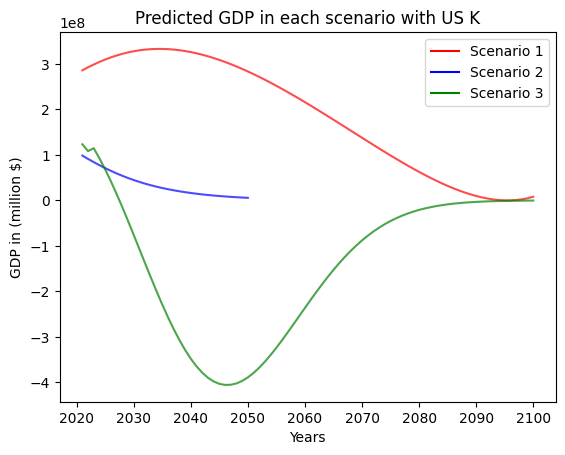

In [ ]:
ax = sns.lineplot(data=dfusa, x='year', y='val', hue='y', palette = ['red', 'blue', 'green'], alpha = 0.7)
ax.set(xlabel = 'Years',
       ylabel = 'GDP in (million $)',
       title = 'Predicted GDP in each scenario with US K')
hands, labs = ax.get_legend_handles_labels()
plt.legend(handles = hands, labels=["Scenario 1", "Scenario 2", "Scenario 3"])
plt.show()

In [ ]:
"""
ei = []
ci = []
result = []
for i in range(221):
  a = i + 1880
  ei1 = model2.predict(np.array([[a]]))
  ei2 = str(ei1).lstrip('[').rstrip(']')
  ei.append(float(ei2))
  ci1 = model3.predict(np.array([[a]]))
  ci2 = str(ci1).lstrip('[').rstrip(']')
  ci.append(float(ci2))
  res = 0.744 / float(ei2) / float(ci2)
  result.append(res)
"""

In [ ]:
#print(ei[170], ci[170])

In [ ]:
#print(ei[220], ci[220])

In [ ]:
#len(result)

In [ ]:
"""
data_s1['y1'] = np.nan
ind = 0
for val in data_s1['ann']:
  data_s1['y1'][ind] = val * result[ind]
  ind = ind + 1
"""

In [ ]:
"""
data_s1['y2'] = np.nan
ind = 0
for val in data_s2['ann'].dropna():
  if ind == 171:
    break
  data_s1['y2'][ind] = val * result[ind]
  ind = ind + 1
"""

In [ ]:
"""
data_s1['y3'] = np.nan
ind = 0
for val in data_s3['cum'].diff():
  data_s1['y3'][ind] = val * result[ind]
  ind = ind + 1
"""

In [ ]:
"""
df = data_s1.melt('year', var_name='y', value_name='val')
df = df.drop(df[df.y == 'cum_emissions_hat1'].index)
df = df.drop(df[df.y=='ann'].index)
"""

In [ ]:

"""ax = sns.lineplot(data=df, x='year', y='val', hue='y', palette = ['red', 'blue', 'green'], alpha = 0.7)
ax.set(xlabel = 'Years',
       ylabel = 'GDP in (billion $)',
       title = 'Predicted GDP in each scenario')
hands, labs = ax.get_legend_handles_labels()
plt.legend(handles = hands, labels=["Scenario 1", "Scenario 2", "Scenario 3"])
plt.show()
"""

In [ ]:
#data_s1['year'][190]

In [ ]:
data_s1.iloc[170]

In [ ]:
"""
year0 = np.array([[1900]])
year1 = np.array([[2100]])
year2 = np.array([[2050]])
year3 = np.array([[2023]])
"""

In [ ]:
"""
ei2023 = model2.predict(np.array([[2023]]))
ci2023 = model3.predict(year3)
print(ei2023, ci2023)
"""

In [ ]:
"""
ei1900 = model2.predict(year0)
ci1900 = model3.predict(year0)
print(ei1900, ci1900)
"""

In [ ]:
"""
ei2100 = model2.predict(year1)
ci2100 = model3.predict(year1)
print(ei2100, ci2100)
"""

In [ ]:
"""
ei2050 = model2.predict(year2)
ci2050 = model3.predict(year2)
print(ei2050, ci2050)
"""

In [ ]:
#model1 = LinearRegression()
#model1.fit(x1, y1)

In [ ]:
#model1.score(x1, y1)

In [ ]:
"""
model_e = LinearRegression()
model_e.fit(x1, y2)
model_e.score(x1, y2)
"""

In [ ]:
"""
model_c = LinearRegression()
model_c.fit(x1, y3)
model_c.score(x1, y3)
"""

In [ ]:
#scen1 = np.array([[6.81e+8]])

In [ ]:
#EI = model_e.predict(scen1)
#print(scen1, EI)

In [ ]:
#CI = model_c.predict(scen1)
#print(scen1, CI)

In [ ]:
#scen2 = np.array([[1.358e+9]])

In [ ]:
#EI = model_e.predict(scen2)
#print(scen2, EI)

In [ ]:
#CI = model_c.predict(scen2)
#print(scen2, CI)

In [ ]:
"""
ax = plt.axes()
ax.scatter(x1, y1, c='gray', marker='o', edgecolors='k', s=18)
plt.show()
"""

In [ ]:
"""
xval = np.linspace(1965, 2020, 55)
a, b = linear_fit(World[0], np.log(World[1]))
yval = a * xval + b

plt.scatter(World[0], np.log(World[1]), color='r')
plt.plot(xval, yval)
plt.title('World Carbon emission')
plt.xlabel('log carbon emission Total GDP')
plt.ylabel('log carbon emissions')
plt.legend(['Actual', 'Predicted'])
"""

In [ ]:
#wd['Annual CO₂ emissions']

In [ ]:
#r2_score(wd['Annual CO₂ emissions'], wd_gdp)

In [ ]:
#r2_score(World[0], World[1])

In [ ]:
# Calculating R2 coefficient
def r_squared(xx,yy,m,c):

  X = xx.values
  Y = yy.values
  # Mean X and Y
  mean_x = np.mean(X)
  mean_y = np.mean(Y)
  # Total number of values
  n = len(X)

  ss_tot=0
  ss_res=0

  for i in range(n):
      y_pred = c + m * X[i]
      ss_tot += (Y[i] - mean_y) ** 2
      ss_res += (Y[i] - y_pred) ** 2
  r2 = 1 - (ss_res/ss_tot)
  return(r2)

In [ ]:
#r_squared(World[0], np.log(World[1]), a, b)